In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models
from torchsummary import summary
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, classification_report

# Dataset:

## Tranformation:

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])

## Loading Dataset:

In [ ]:
train_dir= '/content/drive/MyDrive/Project/plant_dataset/Train/Train'
test_dir = '/content/drive/MyDrive/Project/plant_dataset/Test/Test'
val_dir= '/content/drive/MyDrive/Project/plant_dataset/Validation/Validation'
test_set = datasets.ImageFolder(root=test_dir, transform=transform)
train_set = datasets.ImageFolder(root=train_dir, transform=transform)
val_set = datasets.ImageFolder(root=val_dir, transform=transform)

## Counting Dataset:

In [ ]:
# Assuming you have three datasets: train_set, test_set, and val_set
# Get the class-to-indices mapping for each dataset
class_to_idx_train = train_set.class_to_idx
class_to_idx_test = test_set.class_to_idx
class_to_idx_val = val_set.class_to_idx

# Create dictionaries to store class counts for each dataset
class_count_train = {class_name: 0 for class_name in class_to_idx_train.keys()}
class_count_test = {class_name: 0 for class_name in class_to_idx_test.keys()}
class_count_val = {class_name: 0 for class_name in class_to_idx_val.keys()}

# Count the total number of images in each class within each dataset
for _, class_idx in train_set.samples:
    class_name = [key for key, value in class_to_idx_train.items() if value == class_idx][0]
    class_count_train[class_name] += 1

for _, class_idx in test_set.samples:
    class_name = [key for key, value in class_to_idx_test.items() if value == class_idx][0]
    class_count_test[class_name] += 1

for _, class_idx in val_set.samples:
    class_name = [key for key, value in class_to_idx_val.items() if value == class_idx][0]
    class_count_val[class_name] += 1

# Print the total number of images in each class for each dataset
for class_name, count in class_count_train.items():
    print("TRAIN DATASET:")
    print(f"Class '{class_name}': {count} images")

for class_name, count in class_count_test.items():
    print("TEST DATASET:")
    print(f"Class '{class_name}': {count} images")

for class_name, count in class_count_val.items():
    print("VALIDATION DATASET:")
    print(f"Class '{class_name}': {count} images")

TRAIN DATASET:
Class 'Healthy': 458 images
TRAIN DATASET:
Class 'Powdery': 430 images
TRAIN DATASET:
Class 'Rust': 434 images
TEST DATASET:
Class 'Healthy': 50 images
TEST DATASET:
Class 'Powdery': 50 images
TEST DATASET:
Class 'Rust': 50 images
VALIDATION DATASET:
Class 'Healthy': 20 images
VALIDATION DATASET:
Class 'Powdery': 20 images
VALIDATION DATASET:
Class 'Rust': 20 images


## Plotting Bar Graph For Dataset:

### For Training:

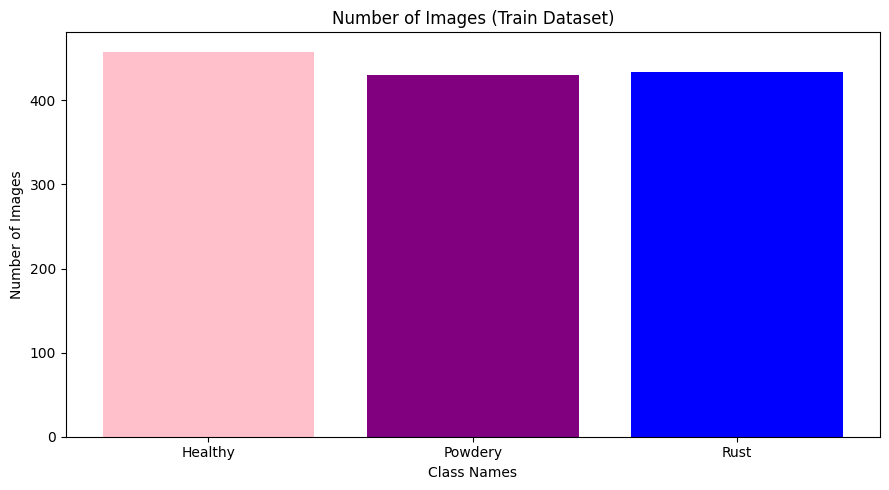

In [ ]:
class_names= list(class_count_train.keys())
images_count= list(class_count_train.values())
# creating a bar graph
plt.figure(figsize=(9,5))
colors=['pink', 'purple', 'blue']
plt.bar(class_names, images_count, color=colors)

plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images (Train Dataset)')
plt.tight_layout()
plt.show()

### For Testing:

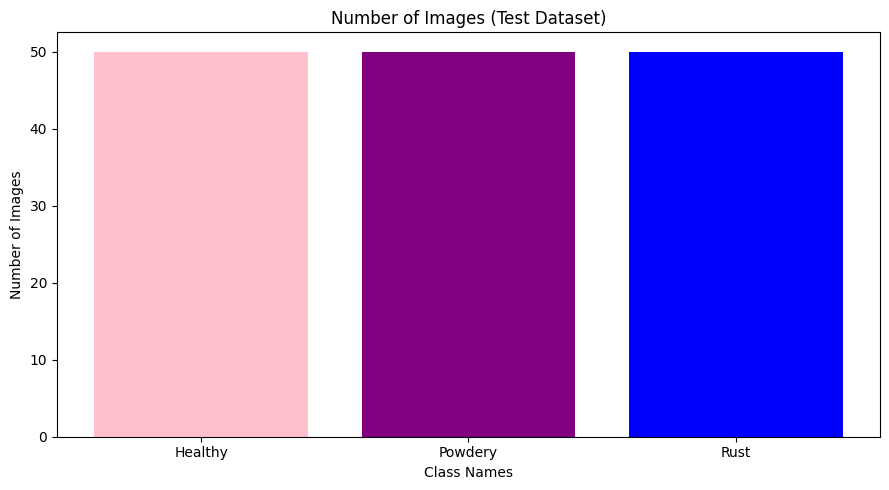

In [ ]:
class_names= list(class_count_test.keys())
images_count= list(class_count_test.values())
# creating a bar graph
plt.figure(figsize=(9,5))
colors=['pink', 'purple', 'blue']
plt.bar(class_names, images_count, color=colors)

plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images (Test Dataset)')
plt.tight_layout()
plt.show()

### For Validation:

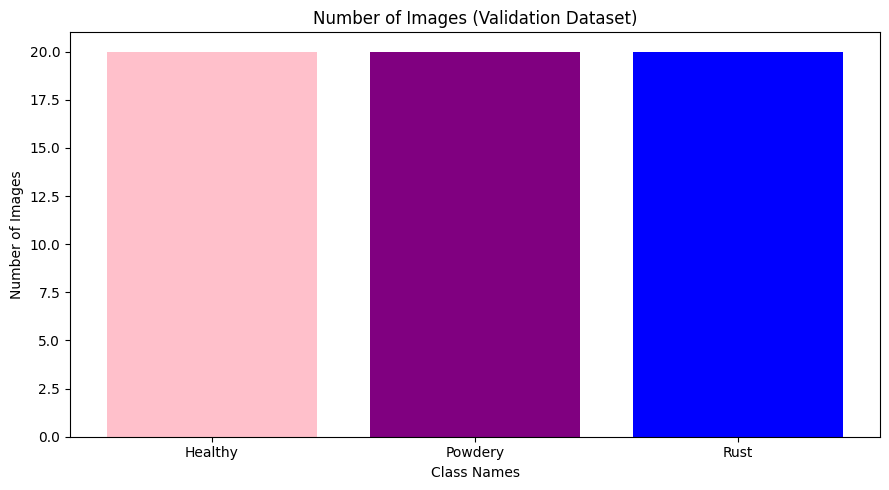

In [ ]:
class_names= list(class_count_val.keys())
images_count= list(class_count_val.values())
# creating a bar graph
plt.figure(figsize=(9,5))
colors=['pink', 'purple', 'blue']
plt.bar(class_names, images_count, color=colors)

plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images (Validation Dataset)')
plt.tight_layout()
plt.show()

# Model:

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

num_classes = 3  # Replace 3 with the actual number of classes in your dataset
model.classifier[1] = nn.Linear(model.last_channel, num_classes)
model.cuda()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 46.7MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

## Loading Summary of Model:

In [ ]:
!pip install torchsummary

## Checking GPU Availability:

In [ ]:

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

# Training:

## Creating Dataloaders:

In [ ]:

# Create data loaders for training, validation, and testing
batch_size =64
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


## Number of Batches:

In [ ]:

# Get the total number of batches
total_batches = len(trainloader)
print(f"Total number of batches: {total_batches}")
total_batches = len(testloader)
print(f"Total number of batches: {total_batches}")
total_batches = len(valloader)
print(f"Total number of batches: {total_batches}")

Total number of batches: 21
Total number of batches: 3
Total number of batches: 1


## Defining Optimizer and Loss Function:

In [ ]:

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Training Accuracy:

In [ ]:
from tqdm import tqdm

# Initialize an empty list to store training loss values
training_losses = []

# Training loop
num_epochs = 10

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(trainloader):
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    training_loss = running_loss / len(trainloader)
    epoch_training_loss = running_loss / len(trainloader)
    training_losses.append(epoch_training_loss)
    training_accuracy = correct_train / total_train
    training_accuracy = correct_train / total_train

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(valloader):
            inputs = inputs.cuda()
            labels = labels.cuda()

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation loss and accuracy
    validation_loss = running_val_loss / len(valloader)
    validation_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {training_loss:.4f}, '
          f'Training Accuracy: {training_accuracy * 100:.2f}%, '
          f'Validation Loss: {validation_loss:.4f}, '
          f'Validation Accuracy: {validation_accuracy * 100:.2f}%')



100%|██████████| 21/21 [08:32<00:00, 24.40s/it]

 10%|█         | 1/10 [08:59<1:20:58, 539.85s/it]

Epoch 1/10, Training Loss: 0.1582, Training Accuracy: 93.87%, Validation Loss: 0.0686, Validation Accuracy: 96.67%



100%|██████████| 21/21 [03:22<00:00,  9.63s/it]

 20%|██        | 2/10 [12:31<46:12, 346.57s/it]  

Epoch 2/10, Training Loss: 0.0500, Training Accuracy: 98.64%, Validation Loss: 0.0127, Validation Accuracy: 100.00%



100%|██████████| 21/21 [03:34<00:00, 10.21s/it]

 30%|███       | 3/10 [16:15<33:56, 290.99s/it]

Epoch 3/10, Training Loss: 0.0091, Training Accuracy: 99.77%, Validation Loss: 0.0158, Validation Accuracy: 98.33%



100%|██████████| 21/21 [03:31<00:00, 10.07s/it]

 40%|████      | 4/10 [19:55<26:17, 262.92s/it]

Epoch 4/10, Training Loss: 0.0041, Training Accuracy: 99.92%, Validation Loss: 0.0021, Validation Accuracy: 100.00%



100%|██████████| 21/21 [03:31<00:00, 10.07s/it]

 50%|█████     | 5/10 [23:37<20:39, 247.93s/it]

Epoch 5/10, Training Loss: 0.0060, Training Accuracy: 99.77%, Validation Loss: 0.0013, Validation Accuracy: 100.00%



100%|██████████| 21/21 [03:27<00:00,  9.89s/it]

 60%|██████    | 6/10 [27:13<15:48, 237.18s/it]

Epoch 6/10, Training Loss: 0.0083, Training Accuracy: 99.70%, Validation Loss: 0.0170, Validation Accuracy: 100.00%



100%|██████████| 21/21 [03:25<00:00,  9.79s/it]

 70%|███████   | 7/10 [30:48<11:30, 230.02s/it]

Epoch 7/10, Training Loss: 0.0151, Training Accuracy: 99.39%, Validation Loss: 0.0004, Validation Accuracy: 100.00%



100%|██████████| 21/21 [03:24<00:00,  9.73s/it]

 80%|████████  | 8/10 [34:22<07:29, 224.88s/it]

Epoch 8/10, Training Loss: 0.0283, Training Accuracy: 99.09%, Validation Loss: 0.0187, Validation Accuracy: 98.33%



100%|██████████| 21/21 [03:22<00:00,  9.62s/it]

 90%|█████████ | 9/10 [37:53<03:40, 220.64s/it]

Epoch 9/10, Training Loss: 0.0249, Training Accuracy: 99.32%, Validation Loss: 0.0023, Validation Accuracy: 100.00%



100%|██████████| 21/21 [03:30<00:00, 10.02s/it]

100%|██████████| 10/10 [41:34<00:00, 249.44s/it]

Epoch 10/10, Training Loss: 0.0264, Training Accuracy: 99.47%, Validation Loss: 0.0243, Validation Accuracy: 98.33%


# Testing:

In [ ]:
# Testing loop
model.eval()
running_test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in (testloader):  # Assuming you have a testloader
        inputs = inputs.cuda()
        labels = labels.cuda()

        outputs = model(inputs)
        test_loss = criterion(outputs, labels)
        running_test_loss += test_loss.item()

        _, predicted = outputs.max(1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate test loss and accuracy
test_loss = running_test_loss / len(testloader)
test_accuracy = correct_test / total_test

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')


Test Loss: 0.0308, Test Accuracy: 98.67%


# Predictions:

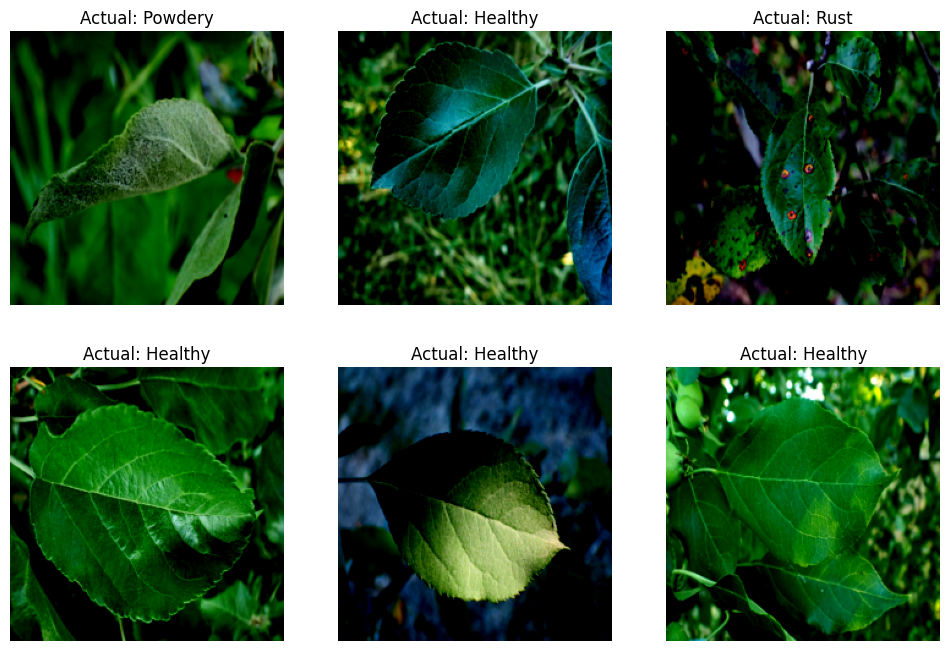

In [ ]:
import random
import matplotlib.pyplot as plt

# Randomly select a subset of actual images and their labels for visualization
num_samples_to_display = 6
sample_indices = random.sample(range(len(val_set)), num_samples_to_display)

# Visualize randomly selected actual images and their labels
plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    image, actual_label = val_set[idx]
    class_name_actual = class_names[actual_label]

    plt.subplot(2, 3, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.title(f"Actual: {class_name_actual}")
    plt.axis('off')

plt.show()


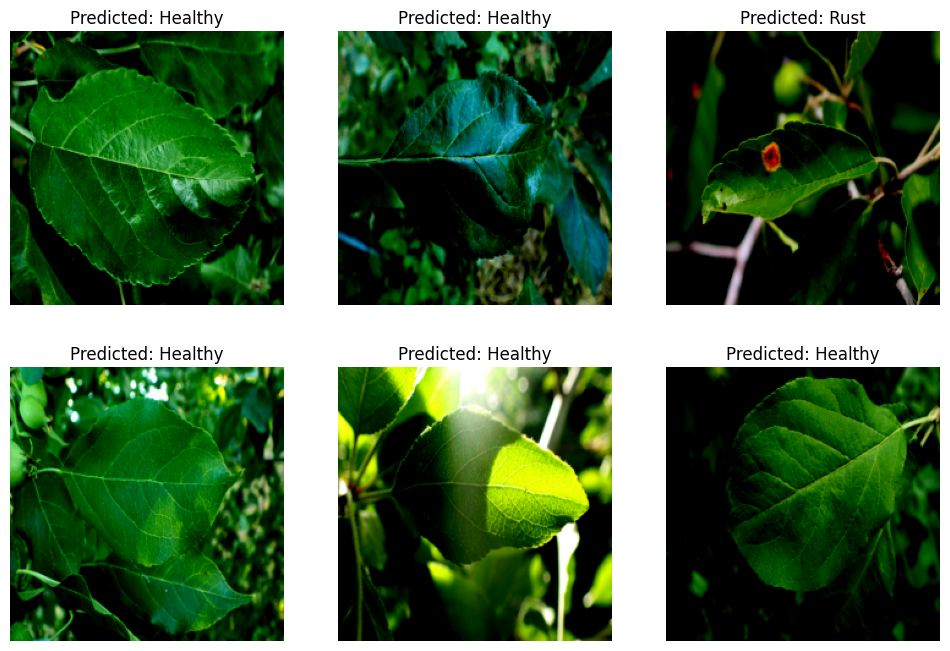

In [ ]:
import random
import torch
import matplotlib.pyplot as plt

# Assuming you have already defined val_set, class_names, model, and valloader as mentioned in your original code

# Make predictions on the validation dataset
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Iterate over the validation data loader and accumulate predictions
predicted_labels = []
model.eval()  # Set the model to evaluation mode

for images, _ in valloader:
    with torch.no_grad():
        images = images.to(device)  # Move images to the GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    predicted_labels.extend(predicted.cpu().tolist())  # Move predictions back to CPU

# Randomly select a subset of predicted images and their labels for visualization
num_samples_to_display = 6
sample_indices = random.sample(range(len(val_set)), num_samples_to_display)

# Visualize randomly selected predicted images and their labels
plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    if idx >= len(predicted_labels):
        print(f"Index {idx} is out of bounds for predicted_labels")
    else:
        image = val_set[idx][0].to(device)  # Move the image to the GPU
        predicted_label = predicted_labels[idx]
        class_name_predicted = class_names[predicted_label]

        plt.subplot(2, 3, i + 1)
        plt.imshow(image.permute(1, 2, 0).cpu().numpy())  # Move the image back to CPU for visualization
        plt.title(f"Predicted: {class_name_predicted}")
        plt.axis('off')

plt.show()


# Evaluation:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Define a function to evaluate the model and create confusion matrix and classification report
def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in dataloader:  # Use the function parameters images and labels
            images = images.cuda()  # Move images to GPU if necessary
            labels = labels.cuda()  # Move labels to GPU if necessary
            outputs = model(images)
            _, predictions = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    report = classification_report(all_labels, all_predictions)
    return cm, report



ValueError: ignored

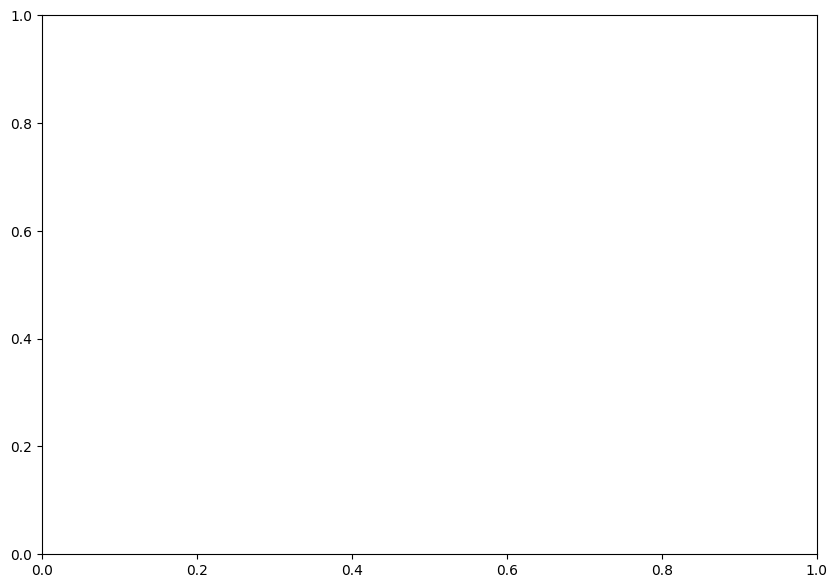

In [ ]:

# Plot the training loss graph
plt.figure(figsize=(10, 7))
plt.plot(range(num_epochs), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Calculate the confusion matrix and classification report for the validation set
val_confusion_matrix, val_classification_report = evaluate_model(model, valloader)
# Display the confusion matrices
print("Validation Confusion Matrix:")
print(val_confusion_matrix)

# Calculate the confusion matrix and classification report for the test set
test_confusion_matrix, test_classification_report = evaluate_model(model, testloader)
print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

Validation Confusion Matrix:
[[19  1  0]
 [ 0 20  0]
 [ 0  0 20]]

Test Confusion Matrix:
[[49  1  0]
 [ 1 49  0]
 [ 0  0 50]]


In [ ]:

print("\nValidation Classification Report:")
print(val_classification_report)
print("\nTest Classification Report:")
print(test_classification_report)


Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50
           2       1.00      1.00      1.00        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



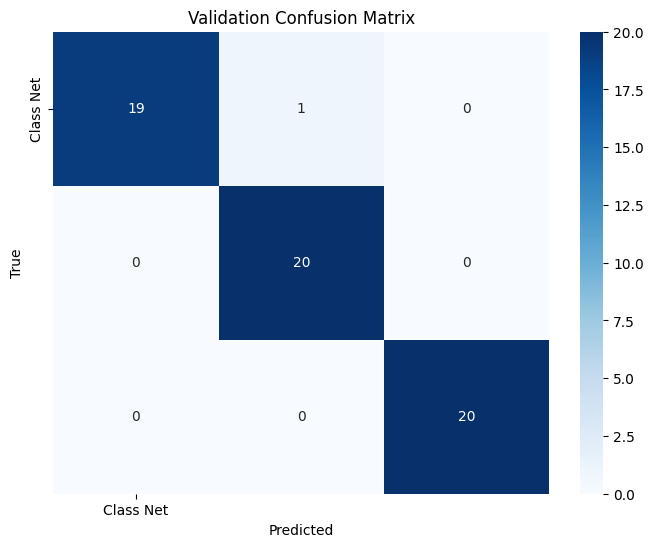

In [ ]:

import seaborn as sns

# Define your class names as a list
class_names = ["Class Net"]

# Define a function to plot a confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot the validation confusion matrix
plot_confusion_matrix(val_confusion_matrix, class_names, "Validation Confusion Matrix")

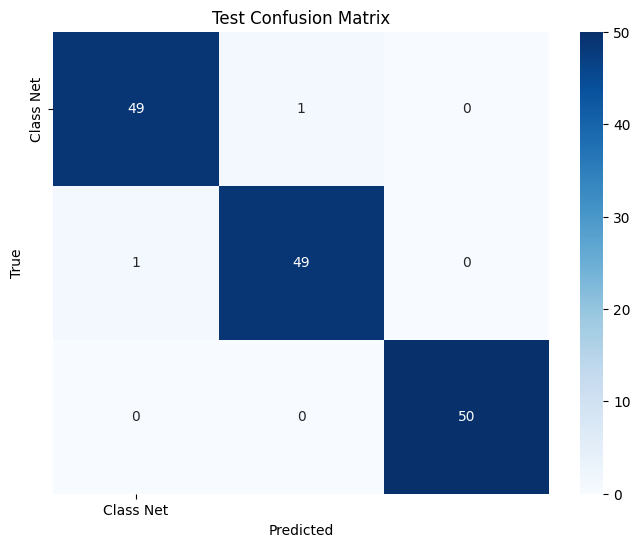

In [ ]:

# Plot the test confusion matrix
plot_confusion_matrix(test_confusion_matrix, class_names, "Test Confusion Matrix")
